# Analyse et conception des algorithmes

## Partie 1 : Afficher un Graphe Non Orienté

### 1.Installer Matplotlib : Assurez-vous que Matplotlib est installé. Si ce n'est pas le cas, installez-le en utilisant pip:

In [16]:
!pip install --upgrade matplotlib

### 2.Créer la fonction de visualisation de graphe :

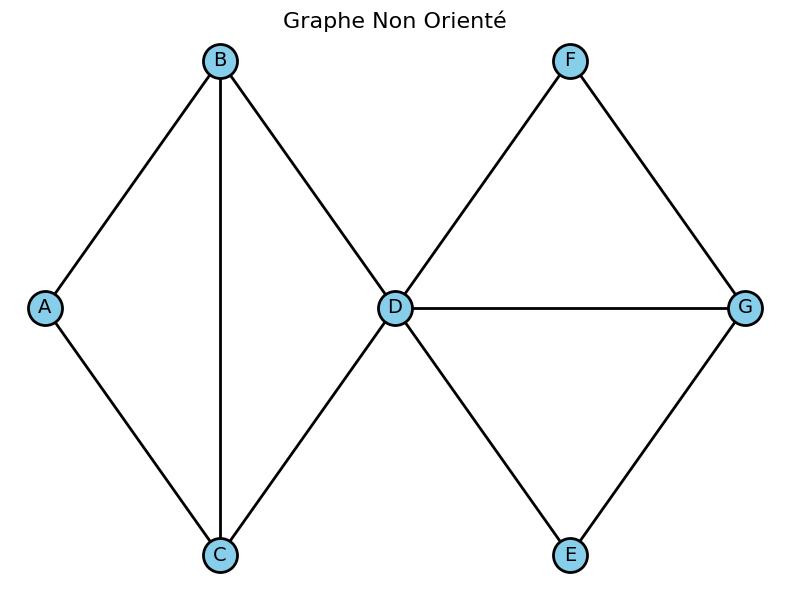

In [45]:
import matplotlib.pyplot as plt

def tracer_graphe_non_oriente(aretes, etiquettes_noeuds):

    # Obtenir une liste de tous les nœuds à partir des arêtes
    noeuds = set([noeud for arete in aretes for noeud in arete])

    # Créer une figure et un axe
    fig, ax = plt.subplots(figsize=(8, 6))  # Ajuster la taille de la figure

    # Dessiner les arêtes
    for noeud1, noeud2 in aretes:
        ax.plot([noeud1[0], noeud2[0]], [noeud1[1], noeud2[1]], 'k-', linewidth=2, zorder=1)  # Augmenter la largeur de la ligne

    # Dessiner les nœuds avec des cercles plus grands
    positions_noeuds = {noeud: (noeud[0], noeud[1]) for noeud in noeuds}
    ax.scatter([pos[0] for pos in positions_noeuds.values()], [pos[1] for pos in positions_noeuds.values()],
               s=600, color='skyblue', edgecolors='black', zorder=2, linewidths=2)  # Augmenter la taille et la largeur du bord

    # Ajouter les étiquettes des nœuds
    for noeud, etiquette in etiquettes_noeuds.items():
        ax.text(noeud[0], noeud[1], etiquette, fontsize=14, ha='center', va='center', color='black', zorder=3)  # Augmenter la taille de la police

    ax.set_title('Graphe Non Orienté', fontsize=16)  # Ajouter un titre
    ax.axis('off')
    plt.tight_layout()  # Ajuster l'espacement autour du tracé
    plt.show()

# Exemple d'utilisation
aretes = [((0, 1), (1, 2)), ((0, 1), (1, 0)), ((1, 2), (1, 0)), ((1, 2), (2, 1)),
         ((1, 0), (2, 1)), ((2, 1), (3, 0)), ((2, 1), (3, 2)), ((2, 1), (4, 1)),
         ((3, 0), (4, 1)), ((3, 2), (4, 1))]
etiquettes_noeuds = {(0, 1): 'A', (1, 2): 'B', (1, 0): 'C', (2, 1): 'D', (3, 0): 'E', (3, 2): 'F', (4, 1): 'G'}

tracer_graphe_non_oriente(aretes, etiquettes_noeuds)


## Partie 2 : Adapter la Fonction pour Afficher un Graphe Orienté

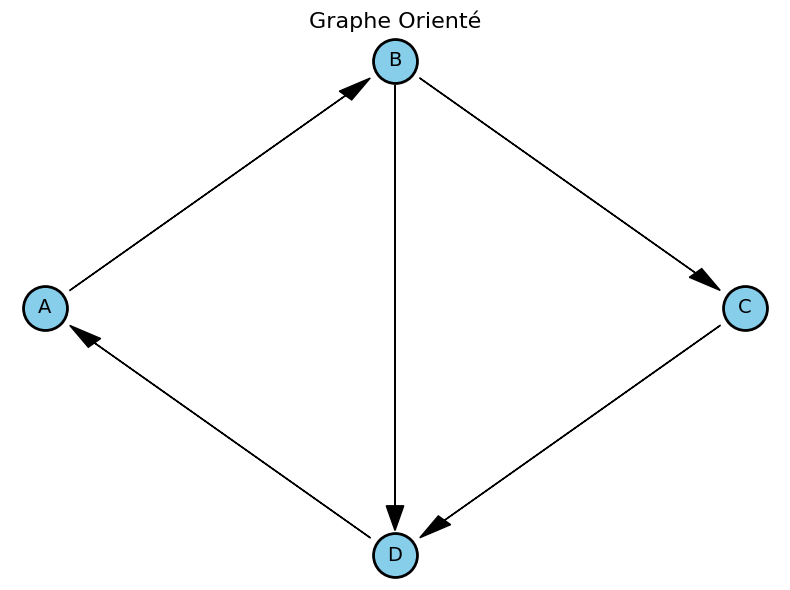

In [46]:
import matplotlib.pyplot as plt
import numpy as np

def tracer_graphe_oriente(aretes):
   
    # Créer un ensemble de tous les nœuds à partir des arêtes
    noeuds = set([noeud for arete in aretes for noeud in arete])

    # Définir les positions fixes pour les nœuds (manuellement)
    positions = {
        1: (0, 1),
        2: (1, 2),
        3: (2, 1),
        4: (1, 0)
    }

    # Créer une figure et un axe
    fig, ax = plt.subplots(figsize=(8, 6))

    # Dessiner les arêtes
    for noeud1, noeud2 in aretes:
        x1, y1 = positions[noeud1]
        x2, y2 = positions[noeud2]
        dx = x2 - x1
        dy = y2 - y1

        # Calculer un petit décalage dans la direction de la flèche
        longueur_fleche = np.sqrt(dx**2 + dy**2)
        offset_x = 0.1 * dx / longueur_fleche
        offset_y = 0.1 * dy / longueur_fleche

        # Ajuster les points de départ et d'arrivée
        ax.arrow(x1 + offset_x, y1 + offset_y, dx - 2 * offset_x, dy - 2 * offset_y,
                 head_width=0.05, head_length=0.1, fc='k', ec='k', zorder=1, length_includes_head=True)

    # Dessiner les nœuds avec des cercles plus grands
    positions_noeuds = {noeud: positions[noeud] for noeud in noeuds}
    ax.scatter([pos[0] for pos in positions_noeuds.values()],
               [pos[1] for pos in positions_noeuds.values()],
               s=1000, color='skyblue', edgecolors='black', zorder=2, linewidths=2)

    # Ajouter les étiquettes des nœuds à l'intérieur des cercles
    for noeud in noeuds:
        x, y = positions[noeud]
        etiquette = chr(64 + noeud)  # Convertir le nombre en lettre majuscule (1 -> A, 2 -> B, etc.)
        ax.text(x, y, etiquette, fontsize=14, ha='center', va='center', color='black', zorder=3)

    ax.set_title('Graphe Orienté', fontsize=16)
    ax.axis('off')
    plt.tight_layout()
    plt.show()

# Exemple d'utilisation
aretes = [(1, 2), (2, 3), (3, 4), (4, 1), (2, 4)]
tracer_graphe_oriente(aretes)


## Partie 3 : Créer une Animation pour le Parcours en largeur BFS

In [21]:
%matplotlib inline


### 1. Algorithme de parcours en largeur , BFS ( Breadth-First Search) 

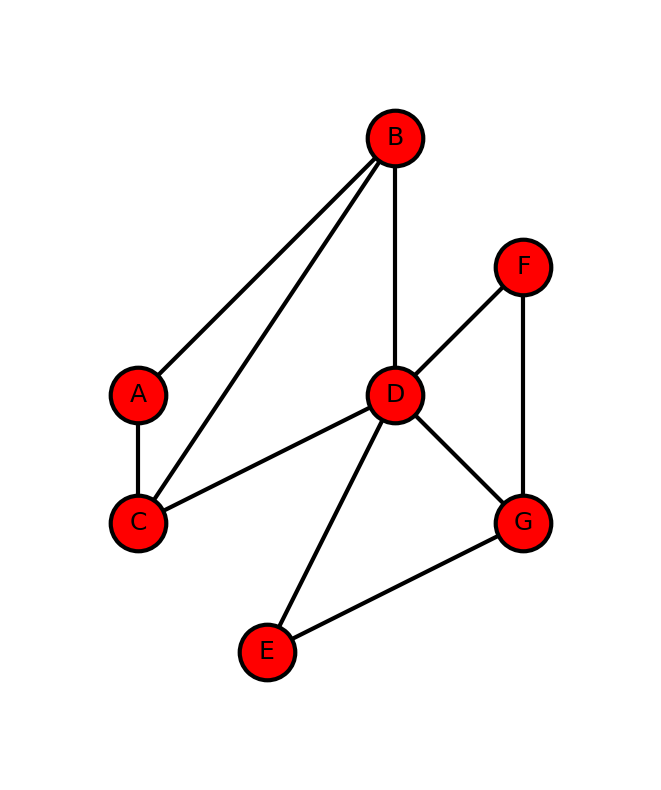

In [48]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from collections import deque
from IPython.display import HTML

def tracer_graphe_non_oriente_avec_positions_fixes(ax, aretes, positions, couleurs_noeuds, tailles_noeuds):

    # Effacer le tracé précédent
    ax.clear()

    # Dessiner les arêtes
    for arete in aretes:
        noeud1, noeud2 = arete
        x_values = [positions[noeud1][0], positions[noeud2][0]]
        y_values = [positions[noeud1][1], positions[noeud2][1]]
        ax.plot(x_values, y_values, 'k-', linewidth=3, zorder=1)  # Augmenter la largeur des arêtes

    # Dessiner les nœuds
    for noeud, (x, y) in positions.items():
        couleur = couleurs_noeuds.get(noeud, 'skyblue')
        taille = tailles_noeuds.get(noeud, 1200)  # Taille par défaut augmentée pour une meilleure visibilité
        ax.scatter(x, y, s=taille, color=couleur, edgecolors='black', linewidths=3, zorder=2)
        ax.text(x, y, noeud, fontsize=18, ha='center', va='center', color='black', zorder=3)  # Augmenter la taille de la police

    ax.set_aspect('equal')
    ax.axis('off')

def animer_bfs(aretes, noeud_depart):
    
    # Définir les positions fixes pour les nœuds
    positions = {
        'A': (1, 2),
        'B': (3, 4),
        'C': (1, 1),
        'D': (3, 2),
        'E': (2, 0),
        'F': (4, 3),
        'G': (4, 1)
    }

    # Créer la liste d'adjacence
    liste_adjacence = {noeud: [] for arete in aretes for noeud in arete}
    for noeud1, noeud2 in aretes:
        liste_adjacence[noeud1].append(noeud2)
        liste_adjacence[noeud2].append(noeud1)

    # Parcours BFS
    visites = set()
    file = deque([noeud_depart])
    sequence_bfs = []

    while file:
        noeud = file.popleft()
        if noeud not in visites:
            visites.add(noeud)
            sequence_bfs.append(noeud)
            for voisin in liste_adjacence[noeud]:
                if voisin not in visites:
                    file.append(voisin)

    # Configurer l'animation
    fig, ax = plt.subplots(figsize=(12, 10))  # Taille de la figure ajustée

    def mise_a_jour(frame):
        couleurs_noeuds = {noeud: 'skyblue' for noeud in positions}
        tailles_noeuds = {noeud: 1200 for noeud in positions}  # Taille par défaut des nœuds augmentée

        for i in range(frame + 1):
            noeud = sequence_bfs[i]
            couleurs_noeuds[noeud] = 'red'
            tailles_noeuds[noeud] = 1600  # Taille augmentée pour les nœuds visités

        tracer_graphe_non_oriente_avec_positions_fixes(ax, aretes, positions, couleurs_noeuds, tailles_noeuds)
        ax.set_xlim(0, 5)
        ax.set_ylim(-1, 5)

    ani = animation.FuncAnimation(fig, mise_a_jour, frames=len(sequence_bfs), repeat=False, interval=1000)
    
    # Utiliser HTML pour afficher l'animation inline dans Jupyter Notebook
    return HTML(ani.to_jshtml())

# Exemple d'utilisation
aretes = [('A', 'B'), ('A', 'C'), ('B', 'C'), ('B', 'D'), ('C', 'D'), ('D', 'E'), ('D', 'F'), ('D', 'G'), ('E', 'G'), ('F', 'G')]
animer_bfs(aretes, noeud_depart='A')
